In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib widget

In [68]:
def f_phi(phi):
    return (0.46*phi) + 17

def f_chi(chi):
    return (0.12*chi) + 6

In [23]:
f_phi(-32)

2.2799999999999994

In [12]:
# this is the floor of the indivisual cost plots
# it defines the relationship between the (phi, nnodes) & (chi, ntasks) where the cost is the lowest
# it calculates how much to shift the parabola at each value phi
fig = plt.figure()
ax = fig.add_subplot(121)


phi = np.arange(-32, +32, 1)
output = f_phi(phi)
ax.plot(phi, output)
ax.set_xlabel("phi domain")
ax.set_ylabel("nnodes(n1) domain")

ax = fig.add_subplot(122)
chi = np.arange(-32, +32, 1)
output = f_chi(chi)
ax.plot(chi, output)
ax.set_xlabel("chi domain")
ax.set_ylabel("ntasks(n2) domain")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'ntasks(n2) domain')

In [13]:
def n1_cost(n1, phi):
    return ((n1 - f_phi(phi))/4)**2
def n1_cost_new(n1, phi):
    return ((n1 - phi)/4)**2
def n2_cost(n2, chi):
    return ((n2 - f_chi(chi))/4)**2
def n3_cost(n3):
    return 10/n3

def cost_12(n1, n2, phi, chi):
    return n1_cost(n1, phi) + n2_cost(n2, chi) + 10

def cost(n1, n2, n3, phi, chi):
    return n1_cost(n1, phi) + n2_cost(n2, chi) + n3_cost(n3) + 10

In [5]:
n1 = np.arange(2,32,1)
phi = np.arange(-32,32,1)
n1_idx, phi_idx = np.meshgrid(n1, phi)
result = n1_cost_new(n1_idx, phi_idx)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(n1_idx, phi_idx, result, cmap='jet')
ax.set_xlabel("nnodes")
ax.set_ylabel("phi")
ax.set_zlabel("cost")


n1 = np.arange(2,32,1)
phi = np.arange(-32,32,1)
n1_idx, phi_idx = np.meshgrid(n1, phi)
result = n1_cost(n1_idx, phi_idx)
ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(n1_idx, phi_idx, result, cmap='jet')
ax1.set_xlabel("nnodes")
ax1.set_ylabel("phi")
ax1.set_zlabel("cost")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'cost')

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]


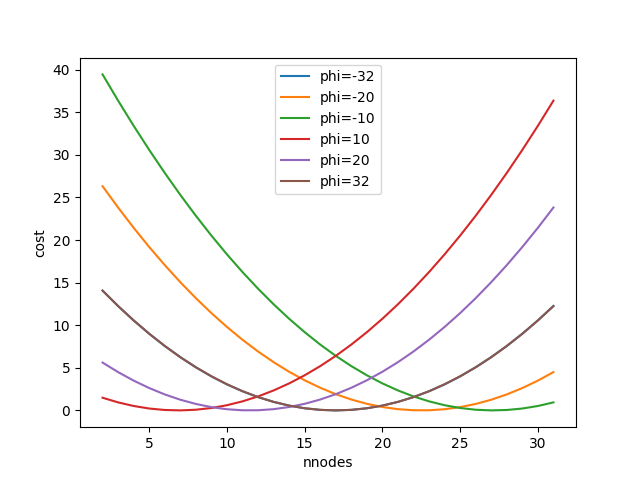

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n1, result[-32,:])
ax.plot(n1, result[-20,:])
ax.plot(n1, result[-10,:])
ax.plot(n1, result[10,:])
ax.plot(n1, result[20,:])
ax.plot(n1, result[32,:])
ax.set_xlabel("nnodes")
ax.set_ylabel("cost")
ax.legend(["phi=-32", "phi=-20", "phi=-10","phi=10", "phi=20", "phi=32"])
print(n1)

Text(0.5, 0, 'cost')

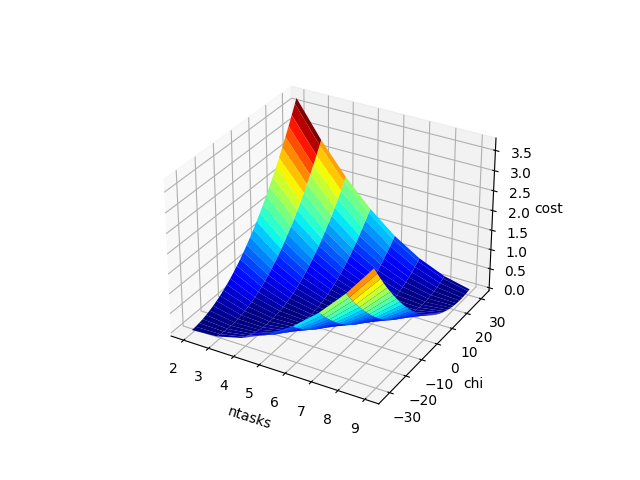

In [9]:
chi = np.arange(-32, 32, 1)
n2 = np.arange(2,10,1)
n2_idx, chi_idx = np.meshgrid(n2, chi)
result = n2_cost(n2_idx, chi_idx)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(n2_idx, chi_idx, result, cmap='jet')
ax.set_xlabel("ntasks")
ax.set_ylabel("chi")
ax.set_zlabel("cost")

Text(0.5, 0, 'cost')

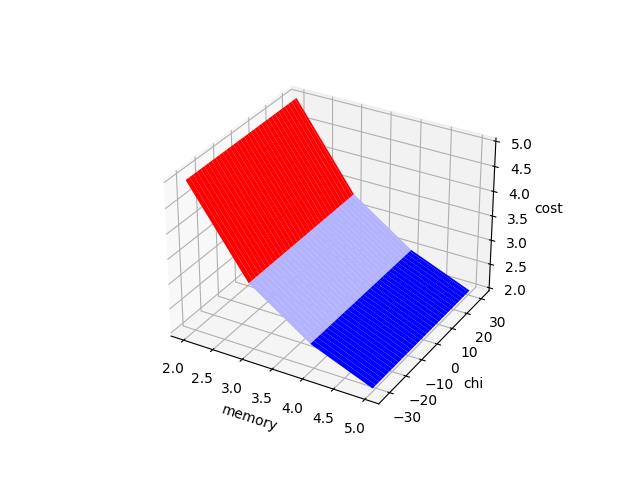

In [10]:
chi = np.arange(-32, 32, 1)
n3 = np.arange(2,6,1)
n3_idx, chi_idx = np.meshgrid(n3, chi)
result = n3_cost(n3_idx)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(n3_idx, chi_idx, result, cmap="bwr")
ax.set_xlabel("memory")
ax.set_ylabel("chi")
ax.set_zlabel("cost")

Text(0.5, 0, 'cost')

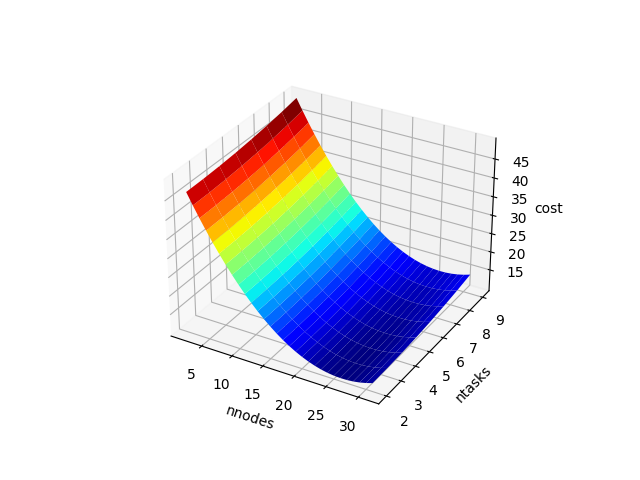

In [11]:
# cost as a function of nnodes and ntasks and no phi and chi
phi = 20
chi = -33

n1 = np.arange(2,32,1)
n2 = np.arange(2,10,1)
n1_idx, n2_idx = np.meshgrid(n1,n2)
result = cost_12(n1_idx,n2_idx, phi, chi)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(n1_idx, n2_idx, result, cmap='jet')
ax.set_xlabel("nnodes")
ax.set_ylabel("ntasks")
ax.set_zlabel("cost")



### Finding minimum analysis

In [25]:
n1 = np.arange(2,32,1)
phi = np.arange(-32,32,1)
n1_idx, phi_idx = np.meshgrid(n1, phi)
result = n1_cost_new(n1_idx, phi_idx)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(n1_idx, phi_idx, result, cmap='jet', alpha=0.1)
ax.scatter3D(2, -32, 0)
ax.set_xlabel("nnodes")
ax.set_ylabel("phi")
ax.set_zlabel("cost")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'cost')

In [58]:
n1 = np.arange(-10,10,1)
phi = np.arange(-32,32,1)
n1_idx, phi_idx = np.meshgrid(n1, phi)
result = n1_cost_new(n1_idx, phi_idx)

In [62]:
min(result[0, :])

0.0

In [67]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n1, result[0, :])

/home/namit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
x = np.linspace(-10,10,100)
def f(x):
    n = x-2.79
    return (n/4)**2
y = f(x)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y)

/home/namit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [88]:
def f_phi(phi):
    return (0.46*phi) + 17

def n1_cost(n1, phi):
    return ((n1 - f_phi(phi))/4)**2

n1_cost(2.2, -32)

0.00039999999999999183

In [101]:
x = np.linspace(2,32,100)
def f(x):
    n = x-2.79
    return (n/4)**2
y = n1_cost(x, -32)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y)

print(y[10])

/home/namit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.4727604224058772


In [103]:
n1 = np.linspace(2,32,100)
phi = np.linspace(-32,32,64)

n1_ids, phi_ids = np.meshgrid(n1, phi)

result = n1_cost(n1_ids, phi_ids)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n1, result[0, :])


print(result[0,10]) # phi -32, n1 2


ax.plot(x,y)

/home/namit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.4727604224058772
